In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:
## FOR NORMALIZATION, no split
data = pd.read_csv('train_2008.csv')
y_train = data.pop('target').values
X_train = preprocessing.scale(np.array(data))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

real_data = pd.read_csv('test_2008.csv')
X_real = preprocessing.scale(np.array(real_data))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [11]:
## FOR NO NORMALIZATION
data = pd.read_csv('train_2008.csv')
y = data.pop('target').values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from sklearn.metrics import roc_auc_score ## To compute the auc score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [6]:
clf = tree.DecisionTreeClassifier(criterion='gini')

clf.fit(X_train, y_train)

print("AUC score is", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

AUC score is 0.5972969781043791


In [7]:
clf_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

clf_rf.fit(X_train, y_train)

print("AUC score is", roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:, 1]))

AUC score is 0.7667460101729654


In [33]:
def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    maximum tree depth parameters in the vector max_depth, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        max_depth: a (T, ) vector of all the max_depth stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    train_auc = []
    test_auc = []
    # Iterate over the different max_depth values
    # fit a model, store train and test err.
    for depth in max_depth:
        clf.set_params(max_depth=depth)
        clf.fit(X_train, y_train)
        train_auc.append(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
        test_auc.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
        
    return train_auc, test_auc

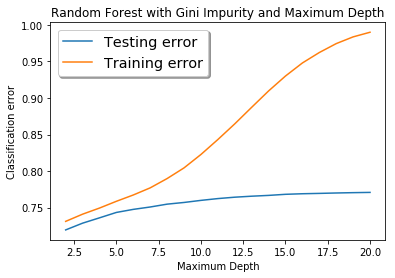

Test error minimized at max_depth = 20


In [35]:
n_estimators = 1000
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

max_depth = np.arange(2, 21)

train_auc, test_auc = eval_tree_based_model_max_depth(clf, max_depth, X_train, 
                                                        y_train, X_test, y_test)

plt.figure()
plt.plot(max_depth, test_auc, label='Testing error')
plt.plot(max_depth, train_auc, label='Training error')
plt.xlabel('Maximum Depth')
plt.ylabel('Classification error')
plt.title('Random Forest with Gini Impurity and Maximum Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test error minimized at max_depth = %i' % max_depth[np.argmax(test_auc)])

## Try a logistic regression model

In [4]:
from sklearn.linear_model import LogisticRegression


In [6]:
clf_lr = LogisticRegression(C=100)
clf_lr.fit(X_train, y_train)
print("AUC score is", roc_auc_score(y_test, clf_lr.predict_proba(X_test)[:, 1]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC score is 0.7715062698014148


## Add cross validation

In [38]:
## FOR NORMALIZATION
data = pd.read_csv('train_2008.csv')
y_train = data.pop('target').values
X_train = preprocessing.scale(np.array(data))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [9]:
from sklearn import model_selection

def cross_val(clf, X_train, y_train):
    
    result = model_selection.cross_validate(clf, X_train, y_train, scoring='roc_auc', cv=10, return_train_score=True)
    return result

In [12]:

#print("Random Froest cv auc score: ", np.mean(cross_val(clf_rf, X_train, y_train)['test_score']))

Decision Tree cv auc score:  0.593035023907719
Random Froest cv auc score:  0.7759626773614076


In [16]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.naive_bayes import GaussianNB 
clf_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf_lr = LogisticRegression(C=100)
clf_nb = GaussianNB()

eclf = EnsembleVoteClassifier(clfs=[clf_rf, clf_lr, clf_nb], weights=[1,1,1])
print("Ensemble cv auc score: ", np.mean(cross_val(eclf, X_train, y_train)['test_score']))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Ensemble cv auc score:  0.7492473277355346


In [18]:
from sklearn.model_selection import GridSearchCV
params = {'logisticregression__C': [_ for _ in range(20, 100, 20)],
          'randomforestclassifier__n_estimators': [20, 200, 50],}

grid = GridSearchCV(estimator=eclf, scoring='roc_auc', param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best cv auc score is", grid.best_score_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Best cv auc score is 0.7455453991757339


In [21]:
grid.best_params_

{'logisticregression__C': 60, 'randomforestclassifier__n_estimators': 200}

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100, 500, 100],}
clf_rf = RandomForestClassifier()
grid = GridSearchCV(estimator=clf_rf, scoring='roc_auc', param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best cv auc score is", grid.best_score_)

Best cv auc score is 0.7757669090551392


In [26]:
grid.best_params_

{'n_estimators': 500}

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
params = {'subsample': [0.2, 1.0, 0.4],}
gbm = GradientBoostingClassifier()
grid = GridSearchCV(estimator=gbm, scoring='roc_auc', param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best cv auc score is", grid.best_score_)

NameError: name 'X_train' is not defined

In [34]:
grid.best_params_

{'subsample': 1.0}

In [17]:
from sklearn.ensemble import VotingClassifier
clf_rf = RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1, max_features=30, min_samples_split=10)
gbm = GradientBoostingClassifier(subsample=1.0, n_estimators=125, min_samples_split=10, max_depth=2)
#eclf = VotingClassifier(estimators=[('rf', clf_rf), ('gbm', gbm)], n_jobs=-1, voting='soft')
print("Ensemble cv auc score: ", np.mean(cross_val(eclf, X_train, y_train)['test_score']))

gbm.fit(X_train, y_train)


Ensemble cv auc score:  0.7862849329581232


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=125,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [37]:
def process_for_submission(y_pred, title):
    lst = y_pred
    print(len(lst))
    
    indexes = [i for i in range(len(lst))]
    result = []
    result.append(indexes)
    result.append(lst)
    result = np.array(result)
    result = np.transpose(result)

    
    
    #df = df.astype(int)
    df = pd.DataFrame(result, columns=['id', 'target'])
    df["id"] = df["id"].astype("int")
    df["target"] = df["target"].astype("float")
    df = df.to_csv (title + 'submission.csv', index = None, header=True)

    
    return df
    

In [93]:
process_for_submission(gbm.predict_proba(X_real)[:, 1])

16000
16000


In [2]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 27 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,"14 days, 1 hour and 58 minutes"
H2O cluster name:,H2O_from_python_pavanchitta_77ipfw
H2O cluster total nodes:,1
H2O cluster free memory:,3.143 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [49]:
## FOR NORMALIZATION
def drop_columns(data):
    drop_columns = []
    for column in data.columns:
        if column != 'target' and data[column].nunique() <= 2:
            drop_columns.append(column)
    return data.drop(columns=drop_columns)
data = pd.read_csv('train_2008.csv')
data = drop_columns(data)
data_train_h2o=h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [55]:
data_train_h2o.shape

(64667, 336)

In [52]:
data_train_h2o['target']=data_train_h2o['target'].asfactor()

In [53]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator


In [54]:
model = H2OGradientBoostingEstimator(## more trees is better if the learning rate is small enough 
  ## here, use "more than enough" trees - we have early stopping
  ntrees = 10000,                                                            

  ## smaller learning rate is better (this is a good value for most datasets, but see below for annealing)
  learn_rate = 0.01,                                                         

  ## early stopping once the validation AUC doesn't improve by at least 0.01% for 5 consecutive scoring events
  stopping_rounds = 5, stopping_tolerance = 1e-4, stopping_metric = "AUC", 

  ## sample 80% of rows per tree
  sample_rate = 0.8,                                                       

  ## sample 80% of columns per split
  col_sample_rate = 0.8,                                                   

  ## fix a random number generator seed for reproducibility
  seed = 1234,                                                             

  ## score every 10 trees to make early stopping reproducible (it depends on the scoring interval)
  score_tree_interval = 10, nfolds=5, max_depth=3)

In [ ]:
model.train(x=data_train_h2o.names[:334],y=data_train_h2o.names[335], training_frame=data_train_h2o, model_id="GBM_Titanic")

gbm Model Build progress: |███████████████████

In [25]:
model.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7403684,0.0017682,0.7371186,0.7400385,0.7446107,0.7389467,0.7411274
auc,0.788024,0.0011355,0.7865814,0.7876176,0.7897809,0.7900138,0.7861264
err,0.2596316,0.0017682,0.2628814,0.2599615,0.2553893,0.2610533,0.2588727
err_count,3357.8,19.169767,3403.0,3373.0,3329.0,3336.0,3348.0
f0point5,0.5196956,0.0038057,0.5241327,0.5137863,0.5273250,0.5191728,0.5140612
f1,0.5641547,0.0028011,0.5665520,0.5578713,0.5692845,0.5652854,0.5617801
f2,0.6169651,0.0025489,0.6164421,0.6102317,0.6184987,0.6203878,0.6192647
lift_top_group,3.338234,0.0687627,3.1667573,3.389004,3.2950249,3.4205031,3.41988
logloss,0.4620249,0.0026428,0.4690596,0.4594412,0.4625498,0.4602530,0.4588207
max_per_class_error,0.3419432,0.0036863,0.3451119,0.3490364,0.3436754,0.3364943,0.3353980


In [26]:
real_data = pd.read_csv('test_2008.csv')
X_real = preprocessing.scale(np.array(real_data))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [27]:
data_test_h2o=h2o.H2OFrame(X_real)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
f=model.predict(test_data=data_train_h2o)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [44]:
f = f.as_data_frame()

In [45]:
f

,predict,p0,p1
0,0,0.798873,0.201127
1,1,0.358850,0.641150
2,0,0.878609,0.121391
3,0,0.900278,0.099722
4,0,0.860172,0.139828
5,0,0.948169,0.051831
6,0,0.942632,0.057368
7,1,0.523197,0.476803
8,1,0.388662,0.611338
9,0,0.865390,0.134610


In [32]:
preds = np.array(f['p1'])

In [42]:
roc_auc_score(y_train, model.predict(test_data=data_train_h2o).as_data_frame()['p1'])

NameError: name 'y_train' is not defined

In [38]:
process_for_submission(preds, 'h2o_gbm')

16000
